## Ngoại lai (Outlier)

Outlier là một điểm dữ liệu khác biệt đáng kể so với dữ liệu còn lại. "Outlier là quan sát sai lệch rất nhiều so với các quan sát khác, làm dấy lên nghi ngờ rằng nó được tạo ra bởi một cơ chế khác." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]


### Có nên loại bỏ outlier?

Tùy thuộc vào bối cảnh, outlier đáng được chú ý đặc biệt hoặc có thể bị bỏ qua hoàn toàn. Lấy ví dụ về dự báo doanh thu: nếu quan sát thấy doanh thu tăng đột biến bất thường của thì cần chú ý thêm đến chúng và tìm nguyên nhân gây ra mức tăng đột biến đó. Tương tự như vậy, một giao dịch bất thường trên thẻ tín dụng thường là dấu hiệu của hoạt động gian lận, đây là điều mà công ty phát hành thẻ tín dụng muốn ngăn chặn. Vậy, sẽ rất hữu ích khi tìm kiếm và điều tra thêm các giá trị outlier trong những trường hợp như thế này.


Tuy nhiên, nếu các outlier được đưa vào do lỗi cơ học, lỗi đo lường hoặc bất kỳ điều gì khác không thể tổng quát hóa thì nên loại bỏ các giá trị outlier này trước khi cung cấp dữ liệu cho thuật toán mô hình hóa. Tại sao? Vì một số thuật toán nhạy với các outlier.


### Các mô hình học máy nào nhạy với outlier?

Một số mô hình học máy nhạy với outlier hơn các mô hình khác. Ví dụ: AdaBoost có thể coi outlier là trường hợp "khó" và đặt trọng số lớn cho các outlier, do đó tạo ra một mô hình có tổng quát hóa không tốt.

Mô hình tuyến tính, cụ thể là Hồi quy tuyến tính cũng nhạy với các outlier.

Cây quyết định có xu hướng bỏ qua sự có mặt của các outlier khi tạo các nhánh của chúng. Thông thường, cây đưa ra quyết định bằng cách hỏi xem biến x >= một giá trị nào đó hay không và do đó outlier sẽ rơi vào mỗi bên của nhánh nhưng sẽ được xử lý công bằng hơn so với các giá trị còn lại, bất kể độ lớn.

Một bài viết nghiên cứu gần đây cho thấy rằng Mạng nơ-ron cũng có thể nhạy với các outlier, miễn là có nhiều outlier và độ lệch cũng cao. Nếu số lượng các outlier cao (>15% như đề xuất trong bài viết) thì chúng không còn là outlier nữa, mà thay vào đó là một đại diện hợp lý của biến đó. Liên kết đến bài viết này có thể tìm thấy trong phần "Additional reading resources" trong phần này của khóa học.


### Cách xác định outlier?

Phân tích outlier và phát hiện bất thường là một lĩnh vực nghiên cứu khổng lồ dành cho việc tối ưu hóa các phương pháp và tạo ra các thuật toán mới để xác định outlier một cách đáng tin cậy. Có rất nhiều cách tối ưu hóa phát hiện điểm bất thường trong các tình huống khác nhau, chủ yếu để xác định outlier khi đó là các quan sát mà chúng ta thực sự muốn tập trung, ví dụ như hoạt động gian lận thẻ tín dụng.


Tuy nhiên trong khóa học này, chúng ta sẽ tập trung vào việc xác định outlier do sai số cơ học hoặc đo lường gây ra. Các outlier đó thực sự là trường hợp hiếm trong tập hợp và điều đó có thể bị bỏ qua. Chúng ta sẽ chỉ ra cách xác định những outlier đó, để ở các phần sau, chúng ta có thể học cách tiền xử lý chúng trước khi sử dụng biến để huấn luyện các thuật toán học máy.


### Phân tích giá trị cực trị (Extreme Value Analysis)

Hình thức phát hiện outlier cơ bản nhất là **Phân tích giá trị cực trị** của dữ liệu 1 chiều. Mấu chốt của phương pháp này là xác định các đuôi thống kê của phân phối cơ bản của biến, sau đó tìm các giá trị nằm ở cuối các đuôi.

Nếu biến được phân phối chuẩn (Gauss) thì các giá trị nằm ngoài giá trị trung bình cộng / trừ 3 lần độ lệch chuẩn của biến được coi là outlier.


- outlier = mean +/- 3* std


Nếu biến vị phân phối lệch thì phương pháp chính là tính quantile rồi IQR như sau:

- IQR = quantile thứ 75 - quantile thứ 25

Outlier sẽ nằm ngoài upper boundary (ranh giới trên) và lower boundary (ranh giới dưới) như sau:

- Upper boundary = quantile thứ 75 + (IQR * 1.5)

- Lower boundary = quantile thứ 25 - (IQR * 1.5)

hoặc cho các trường hợp cực trị:

- Upper boundary = quantile thứ 75 + (IQR * 3)

- Lower boundary = quantile thứ 25 - (IQR * 3)



## Tập dữ liệu cho notebook này: 

Trong mô phỏng này, chúng ta sẽ sử dụng tập dữ liệu Titanic và giá nhà.


Chúng ta cũng dùng tập dữ liệu có trong Scikit-learn:

### Tập dữ liệu giá nhà ở Boston

In [2]:
# in thông tin cho tập dữ liệu boston
from sklearn.datasets import load_boston
print(load_boston().DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Trong bản mô phỏng này:

Chúng ta sẽ:

- Xác định outlier sử dụng phân tích trường hợp toàn vẹn (CCA) ở các biến được phân phối chuẩn.
- Xác định outlier sử dụng phân tích trường hợp toàn vẹn (CCA) ở các biến bị phân phối lệch.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# cho biểu đồ Q-Q 
import scipy.stats as stats

from sklearn.datasets import fetch_openml

In [4]:
# load tập dữ liệu giá nhà ở Boston

# Load the Boston Housing dataset
boston_dataset = fetch_openml(name='boston', version=1, parser='auto')

# Access the data and target variables
X, y = boston_dataset.data, boston_dataset.target

# Create a DataFrame from the data and target
boston = pd.DataFrame(data=X, columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [5]:
# load tập dữ liệu titanic 

titanic = pd.read_csv('../dataset/titanic.csv',
                      usecols=['age', 'fare'])

# biến age và fare có các giá trị bị khuyết
# loại bỏ chúng khỏi mô phỏng
titanic.dropna(subset=['age', 'fare'], inplace=True)

titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


# Xác định phân phối biến

Ở các biến được phân phối chuẩn, outlier là các giá trị nằm ngoài $mean \pm 3 \times std$. Tuy nhiên, nếu các biến bị lệch, chúng ta sẽ tìm outlier bằng cách IQR. Để quyết định sẽ sử dụng phương pháp nào nhằm phát hiện outlier, trước tiên chúng ta cần biết phân phối của biến.

Chúng ta có thể sử dụng biểu đồ tần suất và biểu đồ Q-Q để xác định xem biến có được phân phối chuẩn hay không. Cũng có thể sử dụng biểu đồ hộp để hiển thị trực tiếp các outlier. Biểu đồ hộp là một cách tiêu chuẩn để hiển thị phân bố của một biến bằng cách sử dụng quartile đầu tiên, median, quartile thứ ba và whisker.

Qua biểu đồ hộp, chúng ta có thể dễ dàng xác định:

- Median biểu thị bằng đường bên trong hộp.
- IQR chính là hộp.
- Các quantile, quantile thứ 25 (Q1) là đầu dưới và quantile thứ 75 (Q3) là đầu trên của hộp.
- Whisker:
  -- whisker phía trên: Q3 + 1.5 x IQR
  -- whisker phía dưới: Q1 -1.5 x IQR

Bất kỳ giá trị nào nằm ngoài whisker đều được coi là outlier. Hãy xem các ví dụ dưới đây. 

In [9]:
# hàm tạo biểu đồ tần suất, biểu đồ Q-Q và
# biểu đồ hộp


def diagnostic_plots(df, variable):
    # hàm nhận dataframe (df) và
    # biến cần quan tâm làm đối số

    # xác định kích thước figure
    plt.figure(figsize=(16, 4))

    # biểu đồ tần suất
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # biểu đồ Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel(variable + ' quantiles')

    # biểu đồ hộp
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

## Các biến được phân phối chuẩn

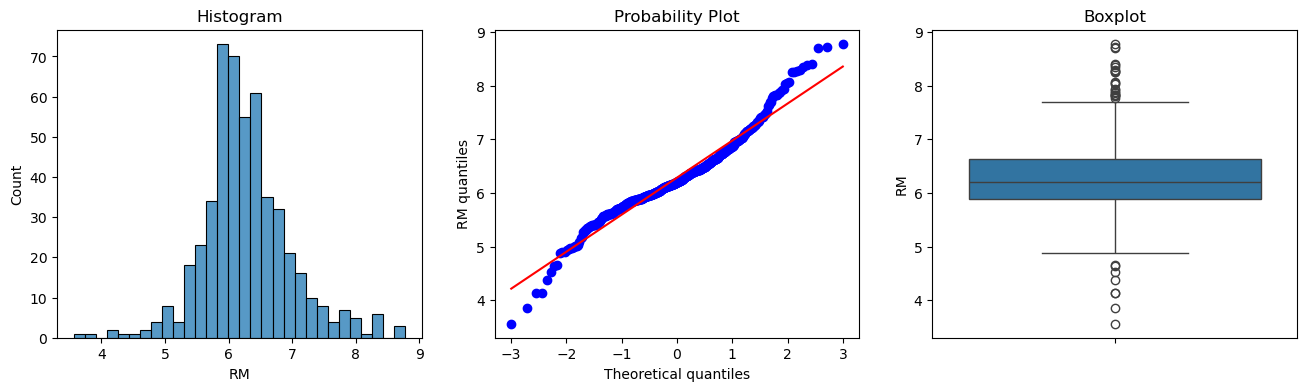

In [10]:
## Yêu cầu 1: bắt đầu với biến RM từ
# tập dữ liệu nhà ở boston.
# RM là trung bình số phòng trên mỗi nhà 

## VIẾT CODE Ở ĐÂY:
diagnostic_plots(boston, 'RM')

Từ biểu đồ tần suất và biểu đồ Q-Q, chúng ta thấy rằng biến RM xấp xỉ khá tốt với phân phối Gauss. Trong biểu đồ hộp, biến có thể có các outlier, vì có nhiều chấm nằm bên ngoài whisker ở cả hai phía của phân phối.

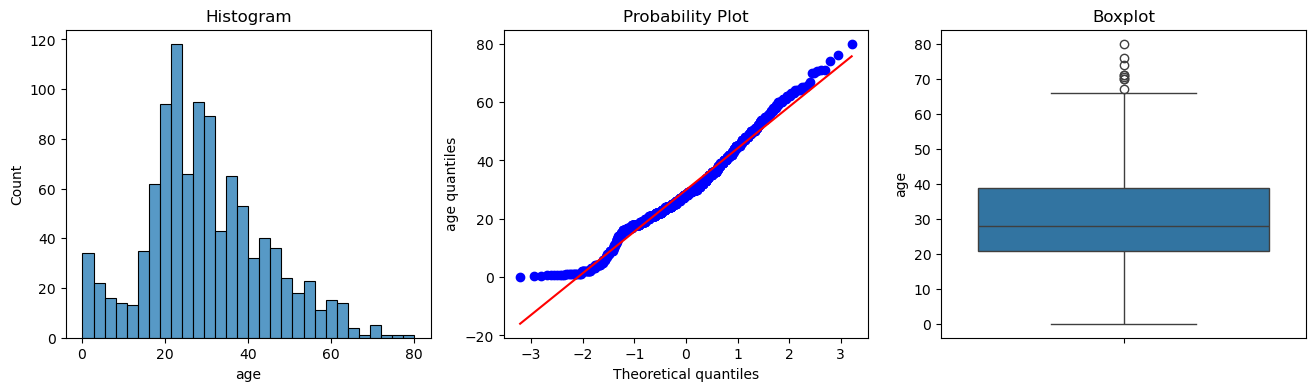

In [11]:
## Yêu cầu 2: kiểm tra biến Age từ tập dữ liệu titanic
# đề cập đến tuối của hành khách trên tàu

## VIẾT CODE Ở ĐÂY:
diagnostic_plots(titanic, 'age')

Từ biểu đồ tần suất và biểu đồ Q-Q, chúng ta thấy rằng biến Age xấp xỉ khá tốt với phân phối Gauss. Có sự sai lệch so với phân phối hướng tới các giá trị nhỏ hơn của age. Trong biểu đồ hộp, biến có thể có các outlier, vì có nhiều chấm nằm bên ngoài whisker ở cả hai phía của phân phối. (whisher trên cùng trong biểu đồ hộp).

## Các biến bị lệch

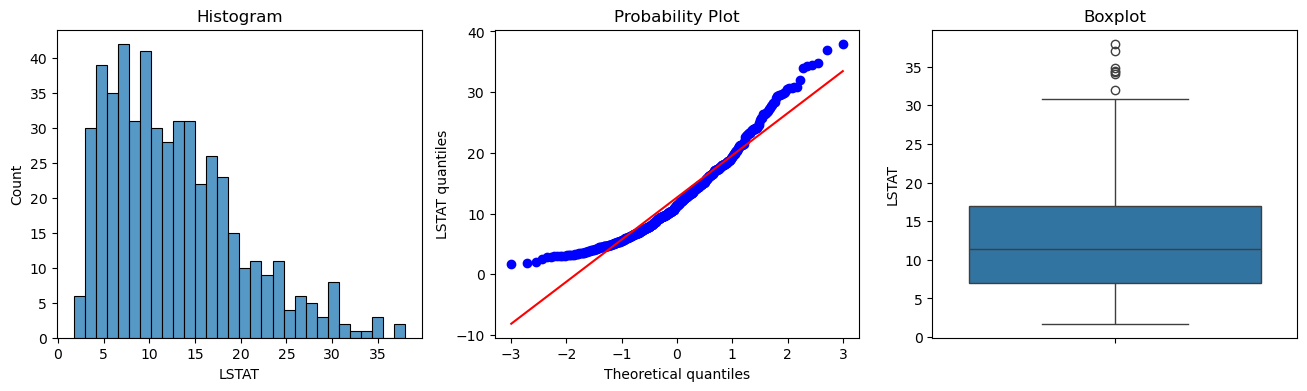

In [12]:
## Yêu cầu 3: biến LSTAT từ tập dữ liệu nhà ở boston 
# LSTAT là % tình trạng thấp hơn trong tập hợp 

## VIẾT CODE Ở ĐÂY:
diagnostic_plots(boston, 'LSTAT')

LSTAT không được phân phối chuẩn, nó bị lệch về bên phải. Theo biểu đồ hộp, có một số outlier ở đuôi bên phải của phân phối.

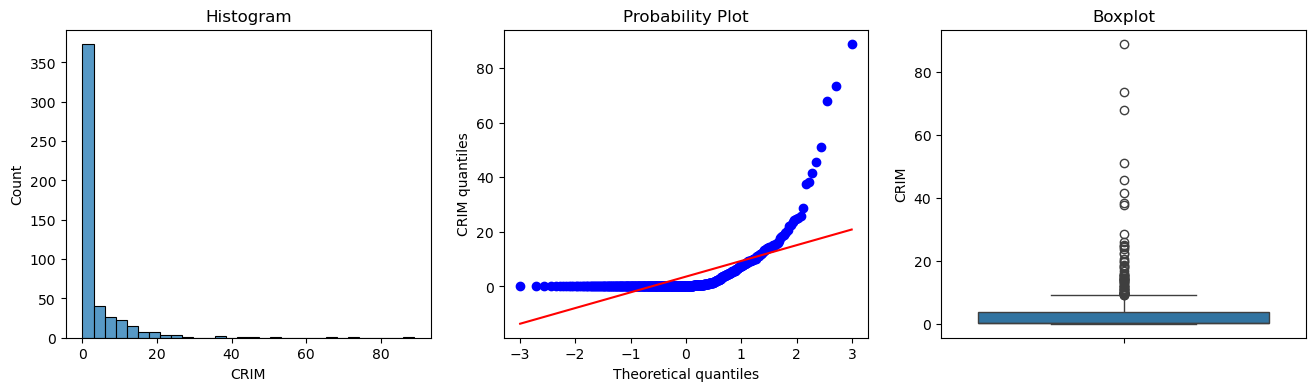

In [13]:
## Yêu cầu 4: biến CRIM từ tập dữ liệu nhà ở boston
# CRIM là tỷ lệ bình quân đầu người tội phạm theo thị trấn 

## VIẾT CODE Ở ĐÂY:
diagnostic_plots(boston, 'CRIM')

CRIM bị lệch khá nhiều vê bên phải. Theo biểu đồ hộp, dường như có khá nhiều outlier ở cuối đuôi bên phải của phân phối.

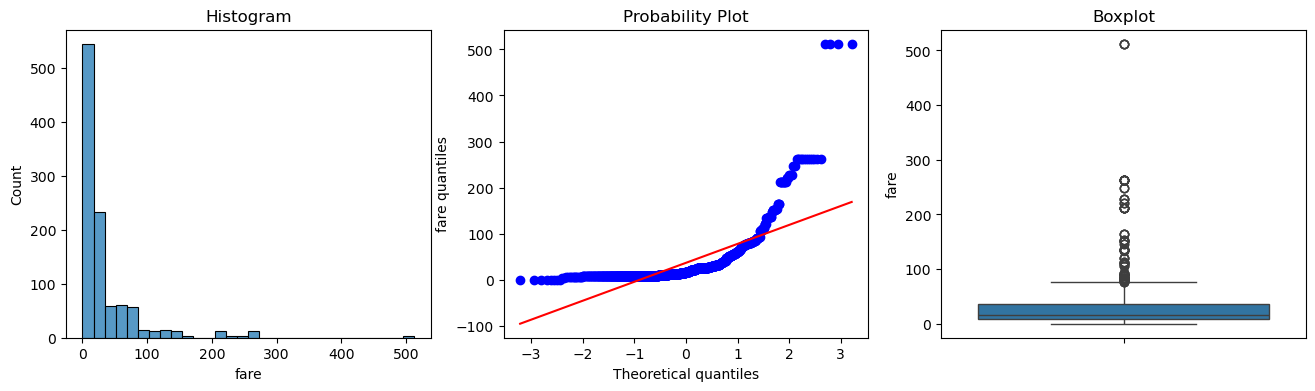

In [14]:
## Yêu cầu 5: biến Fare từ tập dữ liệu titanic
# Fare là giá vé theo 
# hành khách

## VIẾT CODE Ở ĐÂY:
diagnostic_plots(titanic, 'fare')

Fare cũng rất lệch và hiển thị một số giá trị bất thường ở đầu phải của phân phối.

Trong các cell tiếp theo, chúng ta sẽ xác định các outlies bằng cách sử dụng giá trị trung bình và độ lệch chuẩn cho các biến RM và Age từ tập dữ liệu boston và titanic tương ứng. Sau đó, chúng ta sẽ sử dụng IQR để xác định outlier cho các biến LSTAT, CRIM và Fare từ tập dữ liệu boston và titanic.


## Phát hiện ngoại lệ cho các biến được phân phối chuẩn 

In [15]:
# hàm tìm ranh giới trên và dưới
# cho các biến được phân phối chuẩn


def find_normal_boundaries(df, variable):

    # tính các giới hạn bên ngoài outlier
    # cho phân phối Gauss

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [16]:
## Yêu cầu 6: tính các giới hạn cho RM 

## VIẾT CODE Ở ĐÂY:
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)

Từ những điều trên, chúng ta kết luận rằng các giá trị lớn hơn 8.4 hoặc nhỏ hơn 4.2 rất hiếm khi xảy ra với biến RM. Do đó, có thể coi chúng là outlier.

In [17]:
## Yêu cầu 7: kiểm tra số lượng và phần trăm các outlier cho RM

print('total number of houses: {}'.format(len(boston)))

## VIẾT CODE Ở ĐÂY:
print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

## VIẾT CODE Ở ĐÂY:
print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary])))

print()

## VIẾT CODE Ở ĐÂY:
print('% right end outliers: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

## VIẾT CODE Ở ĐÂY:
print('% left end outliers: {}'.format(
    len(boston[boston["RM"] < lower_boundary]) / len(boston)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
houses with less than 4.2 rooms (left end outliers: 4

% right end outliers: 0.007905138339920948
% left end outliers: 0.007905138339920948


Qua Phân tích giá trị cực trị, chúng ta đã xác định được các outlier ở cả hai đầu của phân phối cho RM; tỷ lệ phần trăm outlier thì nhỏ (1.4% nếu xét cả 2 đuôi cùng nhau), điều này có ý nghĩa vì chúng ta đang tìm kiếm chính xác các outlier. Đó là các giá trị hiếm, hiếm xuất hiện.

Hãy chuyển sang Age trong tập dữ liệu titanic.

In [18]:
## Yêu cầu 8: tính các giới hạn cho Age trong titanic

## VIẾT CODE Ở ĐÂY:
upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.01943709155127, -13.315768766192416)

Giới hạn trên là 73 tuổi, có nghĩa là có rất ít hành khách trên 73 tuổi trên tàu Titanic. Ranh giới dưới thì âm vì tuổi âm không tồn tại, chỉ có ý nghĩa khi tìm kiếm outlier bằng ranh giới trên.

In [19]:
## Yêu cầu 9: xem số lượng và tỷ lệ phần trăm các outlier

print('total passengers: {}'.format(len(titanic)))

## VIẾT CODE Ở ĐÂY:
print('passengers older than 73: {}'.format(
    len(titanic[titanic['age'] > upper_boundary])))
print()

## VIẾT CODE Ở ĐÂY:
print('% of passengers older than 73: {}'.format(
    len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

total passengers: 1045
passengers older than 73: 3

% of passengers older than 73: 0.0028708133971291866


Có 2 hành khách hơn 73 tuổi ở trên tàu Titanic, đây có thể được coi là outlier vì phần lớn tập hợp trẻ tuổi hơn nhiều.

### Phát hiện outlier cho các biến bị lệch

In [20]:
# hàm tìm giới hạn trên và dưới
# cho các biến bị phân phối lệch


def find_skewed_boundaries(df, variable, distance):

    # Hãy tính các giới hạn ngoài outlier
    # cho các phân phối lệch

    # truyền distance làm đối số, cho lựa chọn để
    # ước tính 1.5 * IQR hoặc 3 * IQR
    # giới hạn.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [21]:
## Yêu cầut 10: tìm các outlier,
# sử dụng quy tắc tiệm cận IQR
# IQR * 1.5, phép đo chuẩn

# cho LSTAT trong tập dữ liệu nhà ở boston

## VIẾT CODE Ở ĐÂY:
upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [22]:
## Yêu cầu 11: xem số lượng và tỷ lệ phần trăm các outlier
# cho LSTAT

print('total houses: {}'.format(len(boston)))

## VIẾT CODE Ở ĐÂY:
print('houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()

## VIẾT CODE Ở ĐÂY:
print('% houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary]) / len(boston)))

total houses: 506
houses with LSTAT bigger than 32: 7

% houses with LSTAT bigger than 32: 0.01383399209486166


Ranh giới trên hiển thị giá trị ~ 32. Ranh giới dưới thì âm, tuy nhiên biến LSTAT không nhận giá trị âm. Vì vậy, để tính toán các outlier cho LSTAT, chúng ta chỉ sử dụng ranh giới trên. Điều này trùng với những gì chúng ta đã thấy trong biểu đồ hộp trước đó trong notebook. Outlier chỉ nằm ở phần đuôi phải của phân phối LSTAT.

Chúng ta quan sát thấy có 7 ngôi nhà chiếm 1.3% tập dữ liệu có giá trị LSTAT cực kỳ cao.

In [23]:
## Yêu cầu 12: tìm các outlier,
# sử dụng quy tắc tiệm cận IQR
# IQR * 3, giờ hãy tìm các giá trị cực kỳ cao

## VIẾT CODE Ở ĐÂY:
upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [24]:
## Yêu cầu 13: xem số lượng và tỷ lệ phần trăm các outlier
# cho CRIM

print('total houses: {}'.format(len(boston)))
## VIẾT CODE Ở ĐÂY:
print('houses with CRIM bigger than 14: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary])))
print()
      
print('% houses with CRIM bigger than 14s: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

total houses: 506
houses with CRIM bigger than 14: 30

% houses with CRIM bigger than 14s: 0.05928853754940711


Khi sử dụng 3 * IQR để tìm outlier, chúng ta thấy rằng ~6% ngôi nhà cho thấy các khu vực có tỷ lệ tội phạm cao bất thường. Với CRIM cũng vậy, giới hạn dưới âm nên nó chỉ có ý nghĩa khi sử dụng ranh giới trên để tính outlier, vì biến chỉ nhận các giá trị dương. Điều này trùng khớp với những gì chúng ta đã thấy trong biểu đồ hộp CRIM trước đó trong notebook này.

In [25]:
## Yêu cầu 14: cuối cùng, xác định outlier trong Fare trong
# tập dữ liệu titanic, tìm các giá trị cực trị
# sử dụng IQR * 3

## VIẾT CODE Ở ĐÂY:
upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(117.85, -74.3)

In [26]:
## Yêu cầu 15: xem số lượng và tỷ lệ phần trăm hành khách
# trả giá vé cực cao

print('total passengers: {}'.format(len(titanic)))
## VIẾT CODE Ở ĐÂY:
print('passengers who paid more than 117: {}'.format(
    len(titanic[titanic['fare'] > upper_boundary])))
print()
print('% passengers who paid more than 117: {}'.format(
len(titanic[titanic['fare'] > upper_boundary]) / len(titanic)))

total passengers: 1045
passengers who paid more than 117: 67

% passengers who paid more than 117: 0.06411483253588517


Giới hạn dưới là số âm đối với Fare cũng như tất cả các biến khác hiển thị đuôi ở bên phải trong notebook này. Vì vậy, chúng ta sẽ sử dụng ranh giới trên để xác định outlier. Chúng ta quan sát thấy 6% các giá trị của tập dữ liệu nằm phía trên ranh giới.